[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


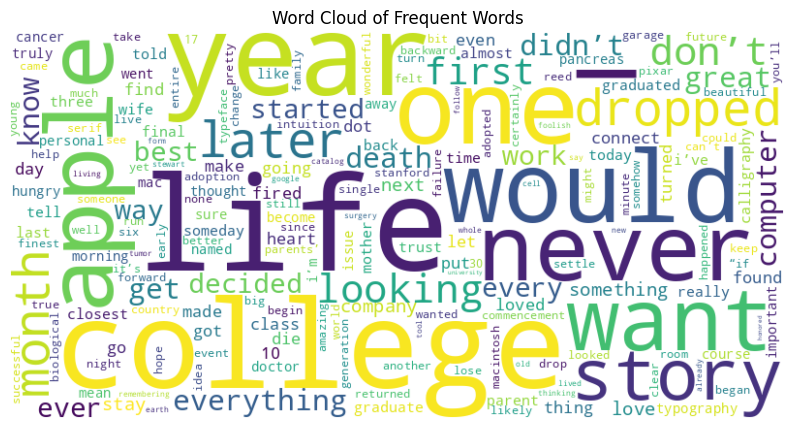

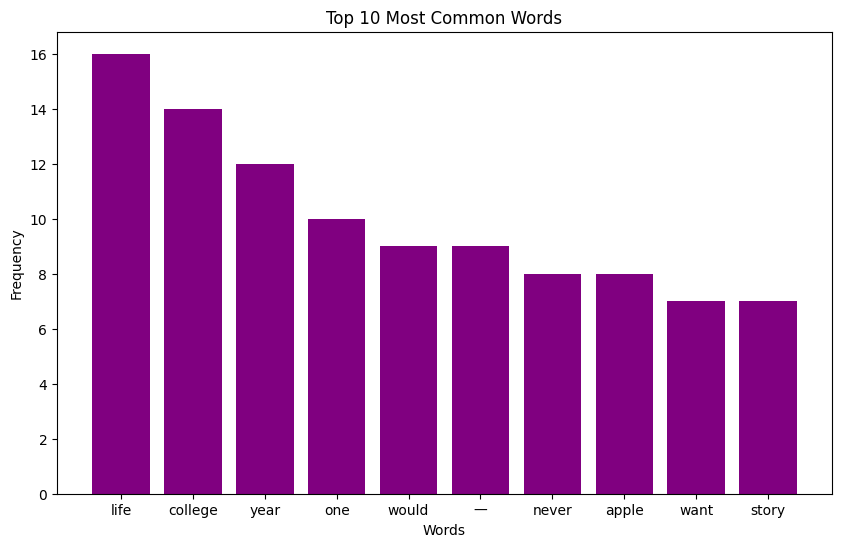

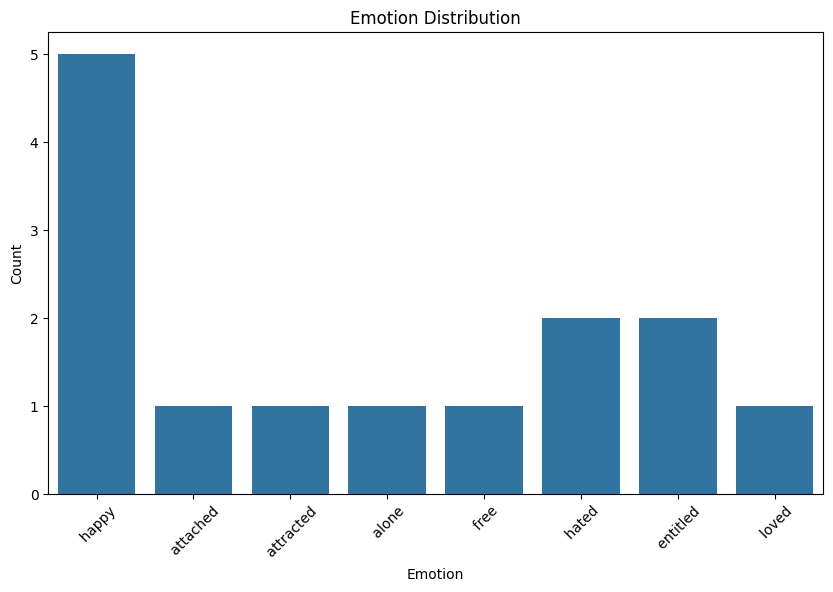

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m


Naive Bayes Model - Accuracy: 0.33
              precision    recall  f1-score   support

    entitled       0.00      0.00      0.00         1
       happy       0.33      1.00      0.50         1
       loved       0.00      0.00      0.00         1

    accuracy                           0.33         3
   macro avg       0.11      0.33      0.17         3
weighted avg       0.11      0.33      0.17         3


Logistic Regression Model - Accuracy: 0.33
              precision    recall  f1-score   support

    entitled       0.00      0.00      0.00         1
       happy       0.33      1.00      0.50         1
       loved       0.00      0.00      0.00         1

    accuracy                           0.33         3
   macro avg       0.11      0.33      0.17         3
weighted avg       0.11      0.33      0.17         3


Support Vector Machine Model - Accuracy: 0.33
              precision    recall  f1-score   support

    entitled       0.00      0.00      0.00         1
  

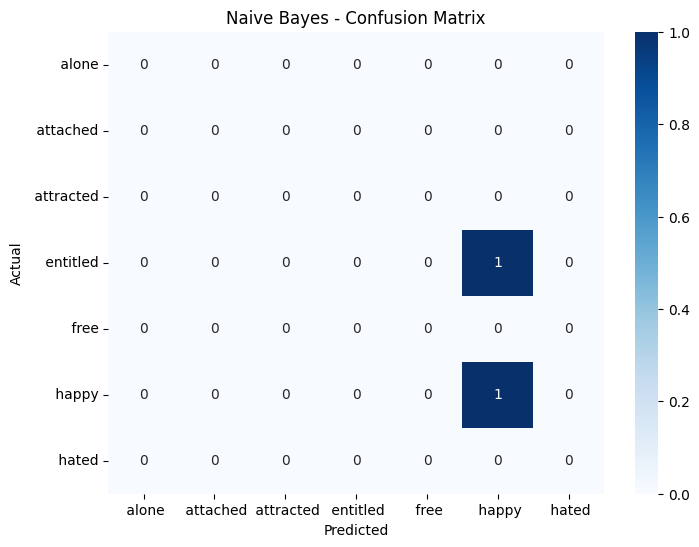

In [38]:
import string
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# Reading and cleaning text data
try:
    with open("read.txt", encoding="utf-8") as file:
        text = file.read().lower()
except FileNotFoundError:
    print("Error: 'read.txt' not found.")
    text = ""

# Remove punctuation and tokenize words
cleaned_text = text.translate(str.maketrans('', '', string.punctuation))
tokenized_words = cleaned_text.split()

# Remove stop words and lemmatize
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()
final_words = [lemmatizer.lemmatize(word) for word in tokenized_words if word not in stop_words]

# Emotion analysis based on external emotion dictionary
emotion_list = []
try:
    with open('emotions.txt', 'r') as file:
        for line in file:
            clear_line = line.replace("\n", '').replace(",", '').replace("'", '').strip()
            word, emotion = clear_line.split(':')
            if word in final_words:
                emotion_list.append(emotion)
except FileNotFoundError:
    print("Error: 'emotions.txt' not found.")

# Count emotions
emotion_counts = Counter(emotion_list)

# EDA - Word Frequency Analysis
word_counts = Counter(final_words)
common_words = word_counts.most_common(10)
words, counts = zip(*common_words)

# Word Cloud Visualization
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Frequent Words')
plt.show()

# Bar Chart of Emotion Counts
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='purple')
plt.title("Top 10 Most Common Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=list(emotion_counts.keys()), y=list(emotion_counts.values()))
plt.title('Emotion Distribution')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Convert emotions to a dataset for model training
data = list(zip(final_words, emotion_list))
if data:
    df = pd.DataFrame(data, columns=['word', 'emotion'])

    # Vectorization using Count Vectorizer
    vectorizer = CountVectorizer()
    X_count = vectorizer.fit_transform(df['word'])
    y = df['emotion']

    # Split data
    X_train_count, X_test_count, y_train, y_test = train_test_split(X_count, y, test_size=0.2, random_state=42)

    # Model Training and Evaluation
    # Naive Bayes
    model_nb = MultinomialNB()
    model_nb.fit(X_train_count, y_train)
    y_pred_nb = model_nb.predict(X_test_count)
    accuracy_nb = accuracy_score(y_test, y_pred_nb)
    report_nb = classification_report(y_test, y_pred_nb)
    print(f"\nNaive Bayes Model - Accuracy: {accuracy_nb:.2f}\n{report_nb}")

    # Logistic Regression
    model_lr = LogisticRegression()
    model_lr.fit(X_train_count, y_train)
    y_pred_lr = model_lr.predict(X_test_count)
    accuracy_lr = accuracy_score(y_test, y_pred_lr)
    report_lr = classification_report(y_test, y_pred_lr)
    print(f"\nLogistic Regression Model - Accuracy: {accuracy_lr:.2f}\n{report_lr}")

    # Support Vector Machine
    model_svm = SVC()
    model_svm.fit(X_train_count, y_train)
    y_pred_svm = model_svm.predict(X_test_count)
    accuracy_svm = accuracy_score(y_test, y_pred_svm)
    report_svm = classification_report(y_test, y_pred_svm)
    print(f"\nSupport Vector Machine Model - Accuracy: {accuracy_svm:.2f}\n{report_svm}")

    # Confusion Matrix for Naive Bayes
    cm_nb = confusion_matrix(y_test, y_pred_nb, labels=model_nb.classes_)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=model_nb.classes_, yticklabels=model_nb.classes_)
    plt.title("Naive Bayes - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

else:
    print("No emotion data available for model training.")